In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification

In [3]:
import pandas as pd
import numpy as np

In [4]:
# path = '/content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification/'
path = '../'

## Load the training meta data

In [8]:
df = pd.read_csv(path + "sample_data/train.csv")

In [9]:
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [10]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

## Number of unique EEGs

In [11]:
len(df['eeg_id'].unique())

17089

## Classes

In [12]:
classes = ['seizure_vote', 'lpd_vote','gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

In [13]:
df[classes].describe()

,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


## Create a column with class probablities

In [14]:
classes_probs = [c.split('_')[0]+'_prob' for c in classes]

In [15]:
df['total_votes'] = df[classes].sum(axis =1)

In [16]:
df['total_votes'].describe()

count    106800.000000
mean          7.255496
std           5.645681
min           1.000000
25%           3.000000
50%           3.000000
75%          13.000000
max          28.000000
Name: total_votes, dtype: float64

array([[<Axes: title={'center': 'seizure_vote'}>,
        <Axes: title={'center': 'lpd_vote'}>,
        <Axes: title={'center': 'gpd_vote'}>],
       [<Axes: title={'center': 'lrda_vote'}>,
        <Axes: title={'center': 'grda_vote'}>,
        <Axes: title={'center': 'other_vote'}>],
       [<Axes: title={'center': 'total_votes'}>, <Axes: >, <Axes: >]],
      dtype=object)

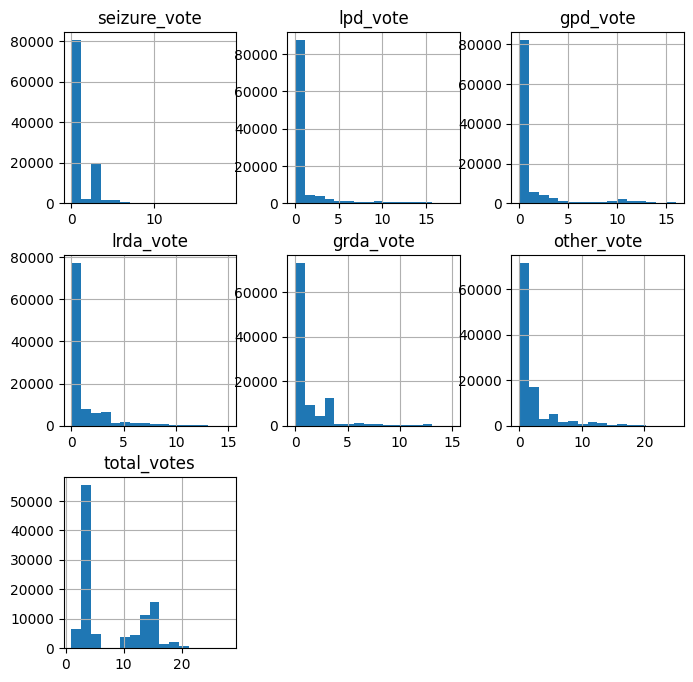

In [17]:

df[classes+['total_votes']].hist(bins=16, figsize=(8, 8))


In [18]:
# df = df[df['total_votes']>5]

In [19]:
# df[['total_votes']].hist(bins=21, figsize=(8, 8))

In [20]:
for i, c in enumerate(classes_probs):
  df[c] = df[classes[i]]/df['total_votes']

In [21]:
df[classes_probs].describe()

,seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob
count,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,0.208319,0.132120,0.128533,0.138913,0.179294,0.212822
std,0.378275,0.277731,0.276172,0.280059,0.336370,0.315197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.200000,0.066667,0.000000,0.076923,0.153846,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'seizure_prob'}>,
        <Axes: title={'center': 'lpd_prob'}>],
       [<Axes: title={'center': 'gpd_prob'}>,
        <Axes: title={'center': 'lrda_prob'}>],
       [<Axes: title={'center': 'grda_prob'}>,
        <Axes: title={'center': 'other_prob'}>]], dtype=object)

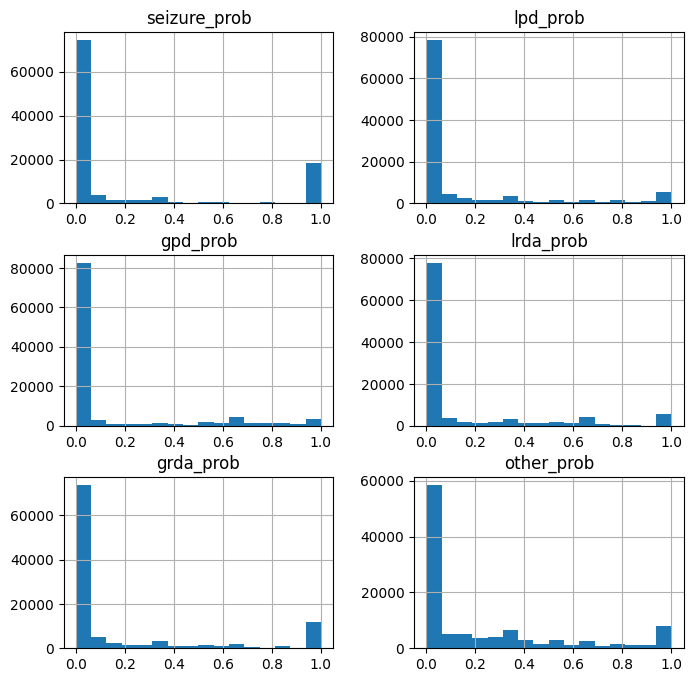

In [22]:
df[classes_probs].hist(bins=16, figsize=(8, 8))

## Find file path

get the name of all files in the/data/train_eegs folder and check if for each eeg_id there is a corresponding file

In [24]:

# import os

# # Get the list of all files in the /data/train_eegs folder
# files = os.listdir(path + 'data/train_eegs')

# # Get the unique eeg_id values from the dataframe
# eeg_ids = df['eeg_id'].unique()

# count = 0
# # Check if for each eeg_id there is a corresponding file
# for eeg_id in eeg_ids:
#   file_name = str(eeg_id) + '.parquet'
#   if file_name not in files:
#     # print(f"File not found for eeg_id: {eeg_id}")
#     count +=1

# print(count, len(eeg_ids))

17083 17089


In [26]:
# prompt: add a column to df call "file_path" if file not found leave blank

# df['file_path'] = path + 'data/train_eegs/' + df['eeg_id'].astype(str) + '.parquet'
# for i in range(len(df)):
#   if not os.path.isfile(df.loc[i, 'file_path']):
#     df.loc[i, 'file_path'] = ''

In [ ]:
len(df[df['file_path'] == ''])

0

## Data spilt


generate a random split of the unique 'eeg_id' for test train and validation


In [43]:
# split the data into train, validation and test sets keeping the distribution of classes the same
import random

eeg_ids_by_class = []
eeg_ids = []
for c in df['expert_consensus'].unique():
  ids = df[df['expert_consensus'] == c]['eeg_id'].unique()
  ids = [i for i in ids if i not in eeg_ids]
  random.shuffle(ids)
  eeg_ids_by_class.append(ids)
  eeg_ids += ids

test_ids = []
val_ids = []
train_ids = []

# Calculate number of samples for each set
for ids in eeg_ids_by_class:
  n_samples = len(ids)
  n_test = int(0.2 * n_samples)
  n_val = int(0.2 * n_samples)

  # Split eeg_id values
  test_ids += ids[:n_test]
  val_ids += ids[n_test:n_test+n_val]
  train_ids += ids[n_test+n_val:]

# Print the number of samples in each set
print(f"Number of test samples: {len(test_ids)}")
print(f"Number of validation samples: {len(val_ids)}")
print(f"Number of train samples: {len(train_ids)}")


Number of test samples: 3416
Number of validation samples: 3416
Number of train samples: 10257


In [45]:
len(train_ids)/(len(train_ids) + len(val_ids)+ len(test_ids)), len(val_ids)/(len(train_ids) + len(val_ids)+ len(test_ids)), len(test_ids)/(len(train_ids) + len(val_ids)+ len(test_ids))

(0.6002106618292469, 0.19989466908537656, 0.19989466908537656)

In [44]:
len(train_ids) + len(val_ids)+ len(test_ids), len(df['eeg_id'].unique())

(17089, 17089)

In [46]:
# prompt: split df by train train and validation using the list generated above

df_train = df[df['eeg_id'].isin(train_ids)]
df_val = df[df['eeg_id'].isin(val_ids)]
df_test = df[df['eeg_id'].isin(test_ids)]


In [47]:
df_train.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote', 'total_votes',
       'seizure_prob', 'lpd_prob', 'gpd_prob', 'lrda_prob', 'grda_prob',
       'other_prob'],
      dtype='object')

In [48]:
# prompt: save each of the dfs to csv

df_train.to_csv(path + 'files/train_processed.csv', index=False)
df_val.to_csv(path + 'files/val_processed.csv', index=False)
df_test.to_csv(path + 'files/test_processed.csv', index=False)


## Copy test data to sample data folder

In [81]:
# prompt: copy test_eeg folder to sample_data folder

!cp -r ./data/test_eegs ./sample_data


In [82]:
!cp -r ./data/test_spectrograms ./sample_data

In [36]:
sample_files = []
for i in range(len(classes)):
  mask = (df[classes_probs[i]]>0.99) & (df['file_path']!='') & (df['total_votes']>=10)
  x = df[mask]
  id = x['eeg_id'].unique()[0]
  f = x[x['eeg_id']==id]['file_path'].values[0]
  v = x[x['eeg_id']==id]['total_votes'].values[0]
  print(len(x), id, v)
  sample_files.append(f.split(path)[1])


17 2088807520 16
1194 1572717157 12
569 3701757135 13
27 2713014975 10
14 2717392258 11
1698 1445780287 17


In [37]:
sample_files

['data/train_eegs/2088807520.parquet',
 'data/train_eegs/1572717157.parquet',
 'data/train_eegs/3701757135.parquet',
 'data/train_eegs/2713014975.parquet',
 'data/train_eegs/2717392258.parquet',
 'data/train_eegs/1445780287.parquet']

In [38]:
# prompt: copy sampe_files to sample_data/train_eegs

!cp {sample_files[0]} ./sample_data/train_eegs
!cp {sample_files[1]} ./sample_data/train_eegs
!cp {sample_files[2]} ./sample_data/train_eegs
!cp {sample_files[3]} ./sample_data/train_eegs
!cp {sample_files[4]} ./sample_data/train_eegs
!cp {sample_files[5]} ./sample_data/train_eegs
